<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [2]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [3]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [4]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [5]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [6]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [7]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

In [9]:
nlp = spacy.load('el_core_news_sm')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
kathimerini_df = pd.read_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Kathimerini_Airbnb.csv")
kathimerini_df['source'] = 'Καθημερινή'
tovima_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_ToVima_Airbnb.csv")
tovima_df['source'] = 'Το Βήμα'
athensvoice_df = pd.read_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_AthensVoice_Airbnb.csv")
athensvoice_df['source'] = 'Athens Voice'
naftemporiki_df = pd.read_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Naftemporiki_Airbnb.csv")
naftemporiki_df['source'] = 'Ναυτεμπορική'
kathimerini_df


article_url  \
0    https://www.kathimerini.gr/society/563664565/t...   
1    https://www.kathimerini.gr/economy/563662750/p...   
2    https://www.kathimerini.gr/economy/563642167/x...   
3    https://www.kathimerini.gr/world/563620822/isp...   
4    https://www.kathimerini.gr/economy/563617870/s...   
..                                                 ...   
144  https://www.kathimerini.gr/economy/561732340/x...   
145  https://www.kathimerini.gr/economy/561730699/a...   
146  https://www.kathimerini.gr/economy/561724801/m...   
147  https://www.kathimerini.gr/economy/561692506/a...   
148  https://www.kathimerini.gr/economy/561671320/a...   

                                                 title        date      time  \
0    Θεσσαλονίκη: Νοίκιασε διαμέρισμα Airbnb και έκ...  2025-06-16  09:34:49   
1           «Παγώνει» και το 2026 το Airbnb στην Αθήνα  2025-06-16  07:34:43   
2                Ξεπέρασαν το 1 εκατ. οι κλίνες Airbnb  2025-05-31  09:06:00   
3    Ισπανία: Εντολή στην Airbnb να σβήσει 65.000 α...  2025-05-19  23:40:00   
4    Στην Airbnb για σεφ, σπα και ιδιωτικές ξεναγήσεις  2025-05-21  16:31:43   
..                                                 ...         ...       ...   
144                              Ξενοδόχοι κατά Airbnb  2022-02-23  21:30:29   
145        Αύξηση κρατήσεων και μικρά κέρδη για Airbnb  2022-02-22  11:16:00   
146  Μισθώσεις τύπου Airbnb: Επανέρχονται οι προσδο...  2022-02-19  08:48:14   
147                Ανάκαμψη των μισθώσεων τύπου Airbnb  2022-01-30  08:45:43   
148        Αυξάνεται η ζήτηση για γραφεία τύπου Airbnb  2022-01-20  07:30:00   

       section                  author  \
0     Κοινωνία                Newsroom   
1    Οικονομία  Προκόπης Χατζηνικολάου   
2    Οικονομία                  Δήκτης   
3       Κόσμος                Newsroom   
4    Οικονομία                Newsroom   
..         ...                     ...   
144  Οικονομία           Ηλίας Μπέλλος   
145  Οικονομία                Newsroom   
146  Οικονομία       Νίκος Ρουσάνογλου   
147  Οικονομία       Νίκος Ρουσάνογλου   
148  Οικονομία       Νίκος Ρουσάνογλου   

                                               excerpt  \
0                 Οι Αρχές προχώρησαν σε δύο συλλήψεις   
1    Δεν θα δοθούν νέες άδειες βραχυχρόνιας μίσθωση...   
2                                                  NaN   
3    Σύμφωνα με την κυβέρνηση, πολλές καταχωρήσεις ...   
4    Το σχέδιο Τσέσκι να δημιουργήσει μια πλατφόρμα...   
..                                                 ...   
144  Επιχειρηματίες χρησιμοποιούν πολυκατοικίες για...   
145  Στροφή στις μακροχρόνιες μισθώσεις από την πλα...   
146  Τα καταλύματα είναι κατά 12% λιγότερα σε σχέση...   
147  Οι διανυκτερεύσεις στην Ελλάδα αυξήθηκαν κατά ...   
148  Τα επόμενα χρόνια προβλέπεται διπλασιασμός του...   

                                             text_body  \
0    Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...   
1    Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...   
2    Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...   
3    Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...   
4    Eίναι φίλος με τον Μπαράκ Ομπάμα, τον Αρνολντ ...   
..                                                 ...   
144  Προσφυγή στην Ελληνική Επιτροπή Ανταγωνισμού κ...   
145  Τον Ιανουάριο, ο ιδρυτής της αμερικανικής πλατ...   
146  Συνολικά 73.232 καταλύματα βραχυχρόνιας μίσθωσ...   
147  Σε ηγέτιδα δύναμη της ανάκαμψης της ζήτησης γι...   
148  Ιδανική φαντάζει η τρέχουσα συγκυρία για την ε...   

                                         feat_img_link  \
0    https://www.kathimerini.gr/wp-content/uploads/...   
1    https://www.kathimerini.gr/wp-content/uploads/...   
2    https://www.kathimerini.gr/wp-content/uploads/...   
3    https://www.kathimerini.gr/wp-content/uploads/...   
4    https://www.kathimerini.gr/wp-content/uploads/...   
..                                                 ...   
144  https://www.kathimerini.gr/wp-content/uploads/...   
145  https://www.kathi

In [13]:
airbnb_df= pd.concat([kathimerini_df, tovima_df, athensvoice_df, naftemporiki_df], ignore_index=True)

In [14]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(363, 14)

In [15]:
airbnb_df.tail(20)

article_url  \
343  https://www.naftemporiki.gr/business/1393531/a...   
344  https://www.naftemporiki.gr/finance/1367750/sa...   
345  https://www.naftemporiki.gr/finance/1358653/ai...   
346  https://www.naftemporiki.gr/finance/1347002/ai...   
347  https://www.naftemporiki.gr/finance/1333726/ai...   
348  https://www.naftemporiki.gr/kosmos/1331159/dim...   
349  https://www.naftemporiki.gr/clickatlife/133080...   
350  https://www.naftemporiki.gr/finance/1325196/ai...   
351  https://www.naftemporiki.gr/finance/economy/13...   
352  https://www.naftemporiki.gr/finance/1317544/aa...   
353  https://www.naftemporiki.gr/kosmos/1316759/air...   
354  https://www.naftemporiki.gr/clickatlife/130857...   
355  https://www.naftemporiki.gr/clickatlife/130708...   
356  https://www.naftemporiki.gr/kosmos/1305155/oi-...   
357  https://www.naftemporiki.gr/finance/1305070/ai...   
358  https://www.naftemporiki.gr/business/1303269/a...   
359  https://www.naftemporiki.gr/clickatlife/130317...   
360  https://www.naftemporiki.gr/finance/1298302/ai...   
361  https://www.naftemporiki.gr/finance/1288632/ai...   
362  https://www.naftemporiki.gr/finance/1287232/gi...   

                                                 title        date      time  \
343  Airbnb: Αυξανόμενη προσφορά καταλυμάτων στην Α...  2022-10-27  13:46:00   
344            Σαρωτικοί έλεγχοι για εισοδήματα Airbnb  2022-09-04  12:22:00   
345  Airbnb: 40% πάνω από τα προ πανδημίας επίπεδα ...  2022-08-03  08:45:00   
346  Airbnb: Απαγορεύει για πάντα τα πάρτι στα σπίτ...  2022-06-29  11:29:13   
347  Airbnb: Γιατί παραιτείται από την αγορά της Κίνας  2022-05-24  08:16:00   
348  Δημιουργία… ηγετών με υποτροφίες από το ίδρυμα...  2022-05-16  21:50:00   
349  Η Airbnb αλλάζει την πολιτική ακύρωσης λόγω κο...  2022-05-16  11:52:00   
350  Airbnb: Καθεστώς εξ΄αποστάσεως εργασίας για πάντα  2022-04-29  09:04:19   
351  Airbnb: Η Ελλάδα πρώτη στην Ευρώπη σε ζήτηση γ...  2022-04-12  13:47:00   
352  ΑΑΔΕ: Μοντέλο «Airbnb» και στις πλατφόρμες del...  2022-04-07  08:08:42   
353  Airbnb: Αναστολή δραστηριοτήτων σε Ρωσία και Λ...  2022-04-05  10:36:08   
354  4 πανέμορφα, πολυτελή Airbnb στην Ελλάδα βγαλμ...  2022-03-14  10:29:00   
355  Πώς μπορείτε να βοηθήσετε τους πρόσφυγες της Ο...  2022-03-10  10:08:00   
356  Οι χρήστες του Airbnb νοικιάζουν σπίτια στην Ο...  2022-03-04  10:40:00   
357       Airbnb: «Check out» από Ρωσία και Λευκορωσία  2022-03-04  08:04:00   
358  Airbnb: Προσφέρει προσωρινή στέγη σε 100.000 Ο...  2022-02-28  13:49:50   
359  Διαμονή σε 5 Airbnb με την καλύτερη θέα στον κ...  2022-02-28  11:16:00   
360  Airbnb: Πώς ο πληθωρισμός θα δημιουργήσει περι...  2022-02-16  08:04:00   
361           Airbnb: Πώς επωφελείται από την πανδημία  2022-01-22  12:59:00   
362           Γίνεται ψηφιακός νομάς ο CEO της Airbnb;  2022-01-19  12:17:00   

                                          section author  \
343                                  Επιχειρήσεις    NaN   
344                            Οικονομία & Αγορές    NaN   
345  Οικονομία & Αγορές                \Οικονομία    NaN   
346                            Οικονομία & Αγορές    NaN   
347                            Οικονομία & Αγορές    NaN   
348                                        Κόσμος    NaN   
349                                   Clickatlife    NaN   
350                            Οικονομία & Αγορές    NaN   
351  Οικονομία & Αγορές                \Οικονομία    NaN   
352                            Οικονομία & Αγορές    NaN   
353                                        Κόσμος    NaN   
354                                   Clickatlife    NaN   
355                                   Clickatlife    NaN   
356                                        Κόσμος    NaN   
357                            Οικονομία & Αγορές    NaN   
358                                  Επιχειρήσεις    NaN   
359                                   Clickatlife    NaN   
360                            Οικονομία & Αγορές    NaN   
361

In [16]:
len(airbnb_df)

363

In [17]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [18]:
short_airbnb_df.tail()

date                                               text
358  2022-02-28  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...
359  2022-02-28  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...
360  2022-02-16  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...
361  2022-01-22  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...
362  2022-01-19  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...

In [19]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [20]:
# import spacy

# # Φόρτωσε το ελληνικό μοντέλο
# nlp = spacy.load("el_core_news_sm")

# # Συνάρτηση για lemmatization
# def lemmatize_text(text):
#     doc = nlp(text)
#     return ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# # Εφάρμοσε σε όλο το dataframe
# short_airbnb_df['text'] = short_airbnb_df['text'].apply(lemmatize_text)

# # short_airbnb_df['lemmatized_text'] = short_airbnb_df['text'].apply(lemmatize_text)
# # short_airbnb_df['text'] = short_airbnb_df['lemmatized_text']
# # short_airbnb_df.drop(columns=['lemmatized_text'], inplace=True)

In [21]:
short_airbnb_df

date                                               text
0    2025-06-16  Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...
1    2025-06-16  Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...
2    2025-05-31  Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...
3    2025-05-19  Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...
4    2025-05-21  Eίναι φίλος με τον Μπαράκ Ομπάμα, τον Αρνολντ ...
..          ...                                                ...
358  2022-02-28  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...
359  2022-02-28  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...
360  2022-02-16  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...
361  2022-01-22  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...
362  2022-01-19  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...

[363 rows x 2 columns]

In [22]:
print("Πριν λεμματοποίηση:")
print(short_airbnb_df['text'].head())

Πριν λεμματοποίηση:
0    Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...
1    Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...
2    Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...
3    Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...
4    Eίναι φίλος με τον Μπαράκ Ομπάμα, τον Αρνολντ ...
Name: text, dtype: object


Top bigrams:
βραχυχρόνια μίσθωση       515
βραχυχρόνιος μισθώσεις    275
βραχυχρόνιος μισθώση      248
βραχυχρόνιος μίσθωση      208
000 ευρώ                  169
εκατ ευρώ                  94
δισ ευρώ                   91
βραχυχρόνιας μίσθωση       90
κέντρο αθήνα               88
σύμφωνα στοιχείο           80
καταλύμα βραχυχρόνια       79
μίσθωση ακινήτων           78
μέσος τιμή                 75
φυσικά πρόσωπο             75
μακροχρόνια μίσθωση        72
dtype: int64


/tmp/ipython-input-24-2292567472.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')


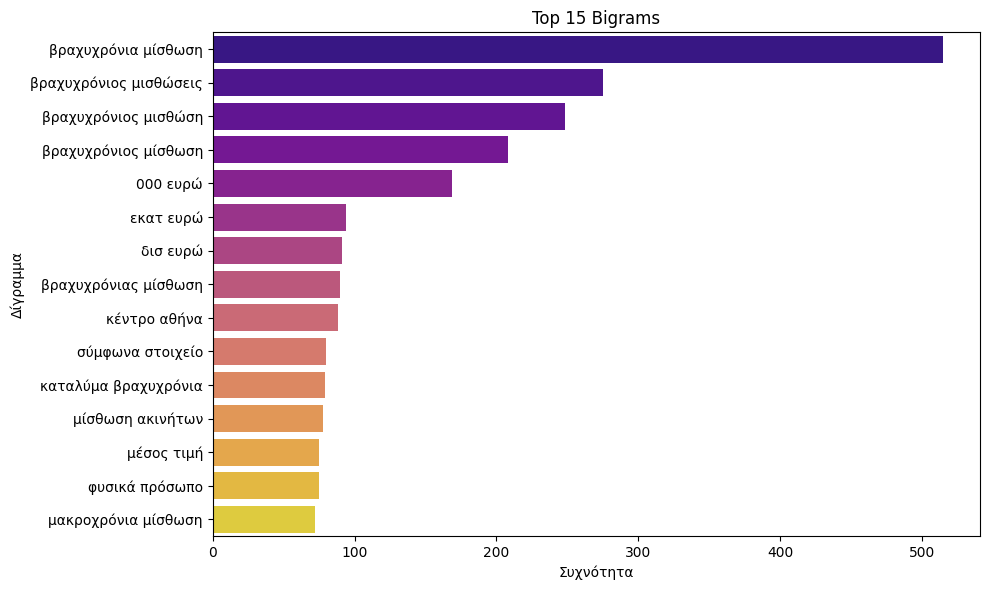

In [24]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("el_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Λεμματοποίηση
short_airbnb_df['text'] = short_airbnb_df['text'].apply(lemmatize_text)

# Stopwords πεζά
stopwords_list = [w.lower() for w in nlp.Defaults.stop_words]

# CountVectorizer bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
bigram_matrix = bigram_vectorizer.fit_transform(short_airbnb_df['text'])

bigram_freq = pd.Series(bigram_matrix.toarray().sum(axis=0),
                        index=bigram_vectorizer.get_feature_names_out()).sort_values(ascending=False).head(15)

print("Top bigrams:")
print(bigram_freq)

# Διάγραμμα
plt.figure(figsize=(10,6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')
plt.title("Top 15 Bigrams")
plt.xlabel("Συχνότητα")
plt.ylabel("Δίγραμμα")
plt.tight_layout()
plt.show()


In [25]:
short_airbnb_df['text_lemmatized'] = short_airbnb_df['text'].apply(lemmatize_text)
short_airbnb_df['text'] = short_airbnb_df['text_lemmatized']
short_airbnb_df.drop(columns=['text_lemmatized'], inplace=True)

In [26]:
print("Μετά λεμματοποίηση:")
print(short_airbnb_df['text'].head())

Μετά λεμματοποίηση:
0    συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...
1    στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...
2    δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...
3    κυβέρνηση ισπανία δίνω εντολή airbnb αποσύρω π...
4    eίμαι φίλος μπαράκ ομπάμα αρνολντ σβαρτσενέγκε...
Name: text, dtype: object


In [27]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [28]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     1      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

/tmp/ipython-input-29-1925883420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')


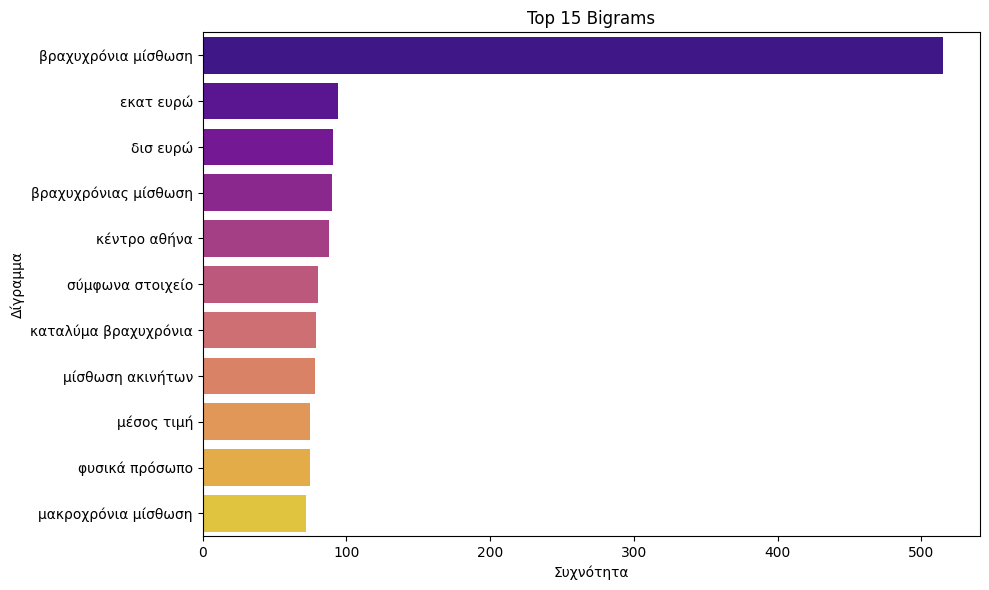

In [29]:
bigram_freq = bigram_freq.drop(['βραχυχρόνιος μίσθωση', 'βραχυχρόνιος μισθώση', 'βραχυχρόνιος μισθώσεις' , '000 ευρώ'], errors='ignore')
plt.figure(figsize=(10,6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')
plt.title("Top 15 Bigrams")
plt.xlabel("Συχνότητα")
plt.ylabel("Δίγραμμα")
plt.tight_layout()
plt.show()


In [30]:
wordcount_df.shape

(363, 13161)

In [31]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [32]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    11
1    46
2    21
dtype: int64

In [33]:
short_airbnb_df.head(3)

date                                               text
0  2025-06-16  συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...
1  2025-06-16  στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...
2  2025-05-31  δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...

In [34]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [35]:
short_airbnb_df

date                                               text  anger  \
0    2025-06-16  συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...      6   
1    2025-06-16  στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...      6   
2    2025-05-31  δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...      6   
3    2025-05-19  κυβέρνηση ισπανία δίνω εντολή airbnb αποσύρω π...      2   
4    2025-05-21  eίμαι φίλος μπαράκ ομπάμα αρνολντ σβαρτσενέγκε...      4   
..          ...                                                ...    ...   
358  2022-02-28  ηλεκτρονικός πλατφόρμα βραχυπρόθεσμων μισθώση ...      0   
359  2022-02-28  παράθυρο θέα παίρνω διάσταση παρακάτω airbnb β...      1   
360  2022-02-16  πληθωρισμός καλπάζω παγκοσμίως οδηγώς πολύς οι...     17   
361  2022-01-22  πανδημία μέλλον φέρνει ευέλικτος τρόπος ζωή ερ...      4   
362  2022-01-19  διευθύνων σύμβουλος airbnb    μπράιαν τσέσκι γ...      2   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0          18    6        5         8     11             9        6        18   
1          60   18        0        11     46            18        9        32   
2          39    5        4        10     21            13        6        12   
3          20    5        1         1     15             2        2         5   
4          58   16        4        11     26            20        3        12   
..        ...  ...      ...       ...    ...           ...      ...       ...   
358         6    0        0         0      4             1        3         1   
359         5    1        2         1      2             4        0         5   
360        56    9        3        15     29            15       15        31   
361        28    8        1         9     11            12        8        11   
362        30    7        1         4     10            11        3         6   

     fear  
0      16  
1      19  
2      12  
3       5  
4      10  
..    ...  
358     1  
359     2  
360    31  
361     8  
362     4  

[363 rows x 12 columns]

In [36]:
len(short_airbnb_df)

363

In [41]:
# short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index, format='mixed', yearfirst=True)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)
display(short_airbnb_df.head())

text  anger  \
date                                                                   
2025-06-16  συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...      6   
2025-06-16  στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...      6   
2025-05-31  δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...      6   
2025-05-19  κυβέρνηση ισπανία δίνω εντολή airbnb αποσύρω π...      2   
2025-05-21  eίμαι φίλος μπαράκ ομπάμα αρνολντ σβαρτσενέγκε...      4   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-06-16        18    6        5         8     11             9        6   
2025-06-16        60   18        0        11     46            18        9   
2025-05-31        39    5        4        10     21            13        6   
2025-05-19        20    5        1         1     15             2        2   
2025-05-21        58   16        4        11     26            20        3   

            negative  fear  
date                        
2025-06-16        18    16  
2025-06-16        32    19  
2025-05-31        12    12  
2025-05-19         5     5  
2025-05-21        12    10

<Axes: xlabel='date'>

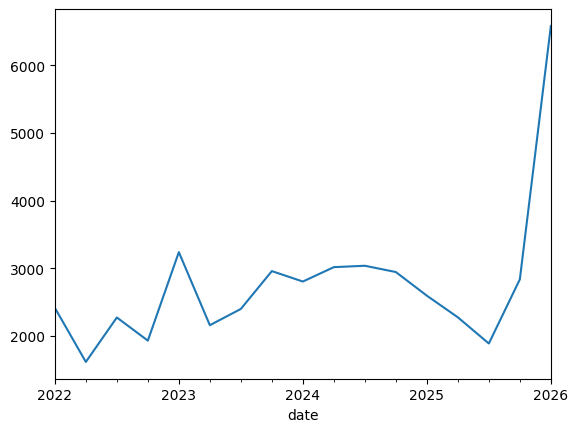

In [42]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-43-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

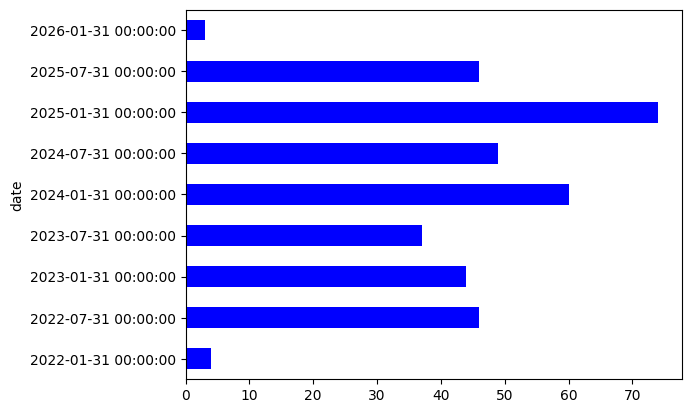

In [43]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [44]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [45]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-46-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-46-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-46-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-46-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-46-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

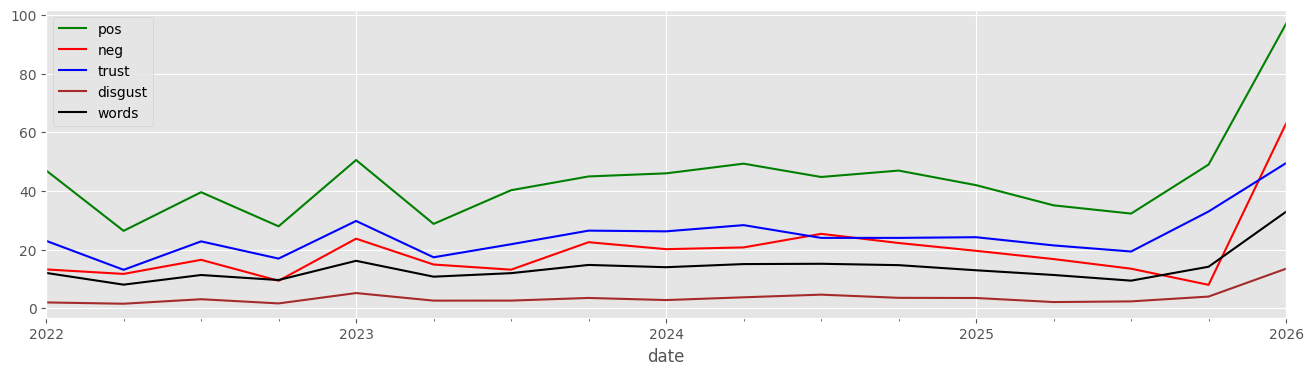

In [46]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [47]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-48-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

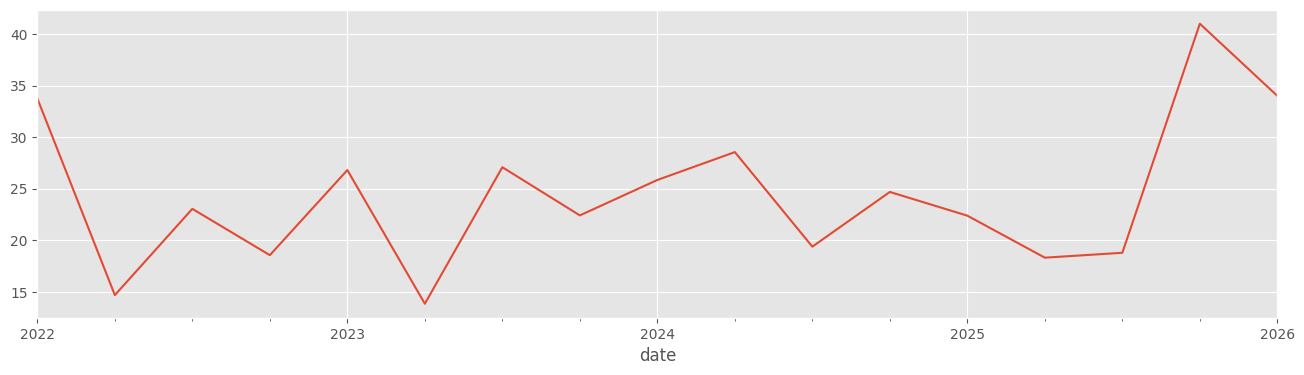

In [48]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [49]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-50-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-50-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

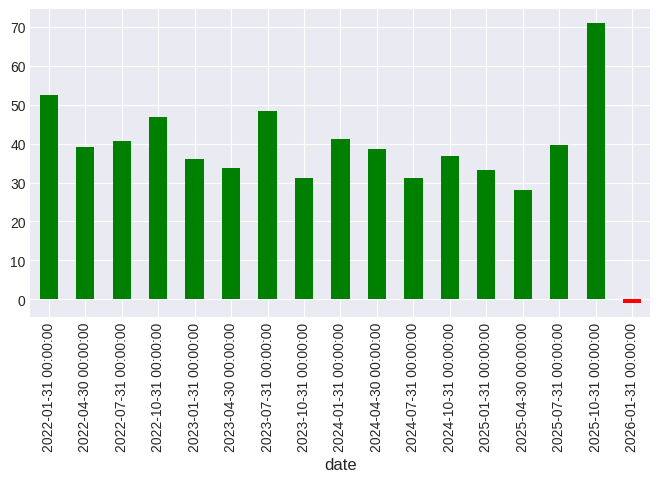

In [50]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-65-3375745110.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

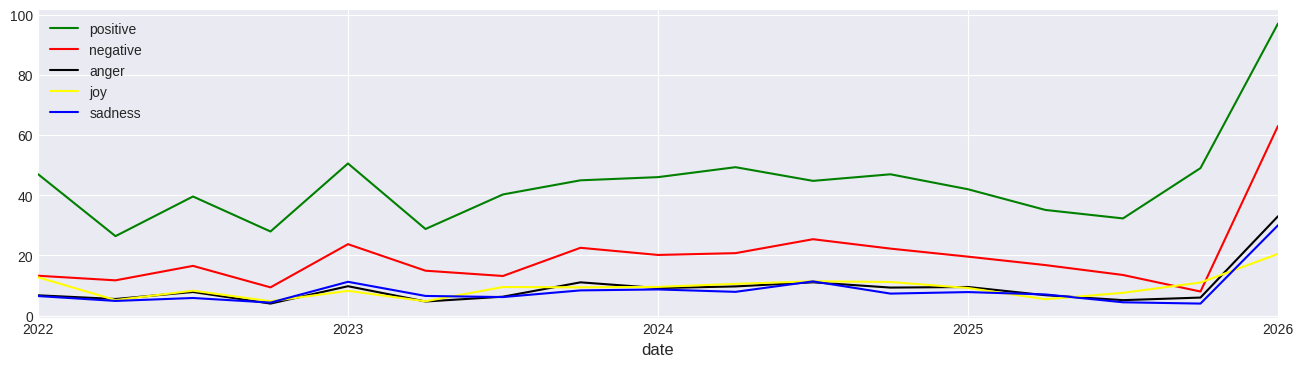

In [65]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})
colors = ['green', 'red', 'black', 'yellow', 'blue']
# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line', color=colors)


In [52]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2022-05-19        16         1                             89.0
2024-12-30         8        20                            -43.0
2023-07-12        36         2                             89.0
2022-10-27        35         2                             89.0

In [53]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

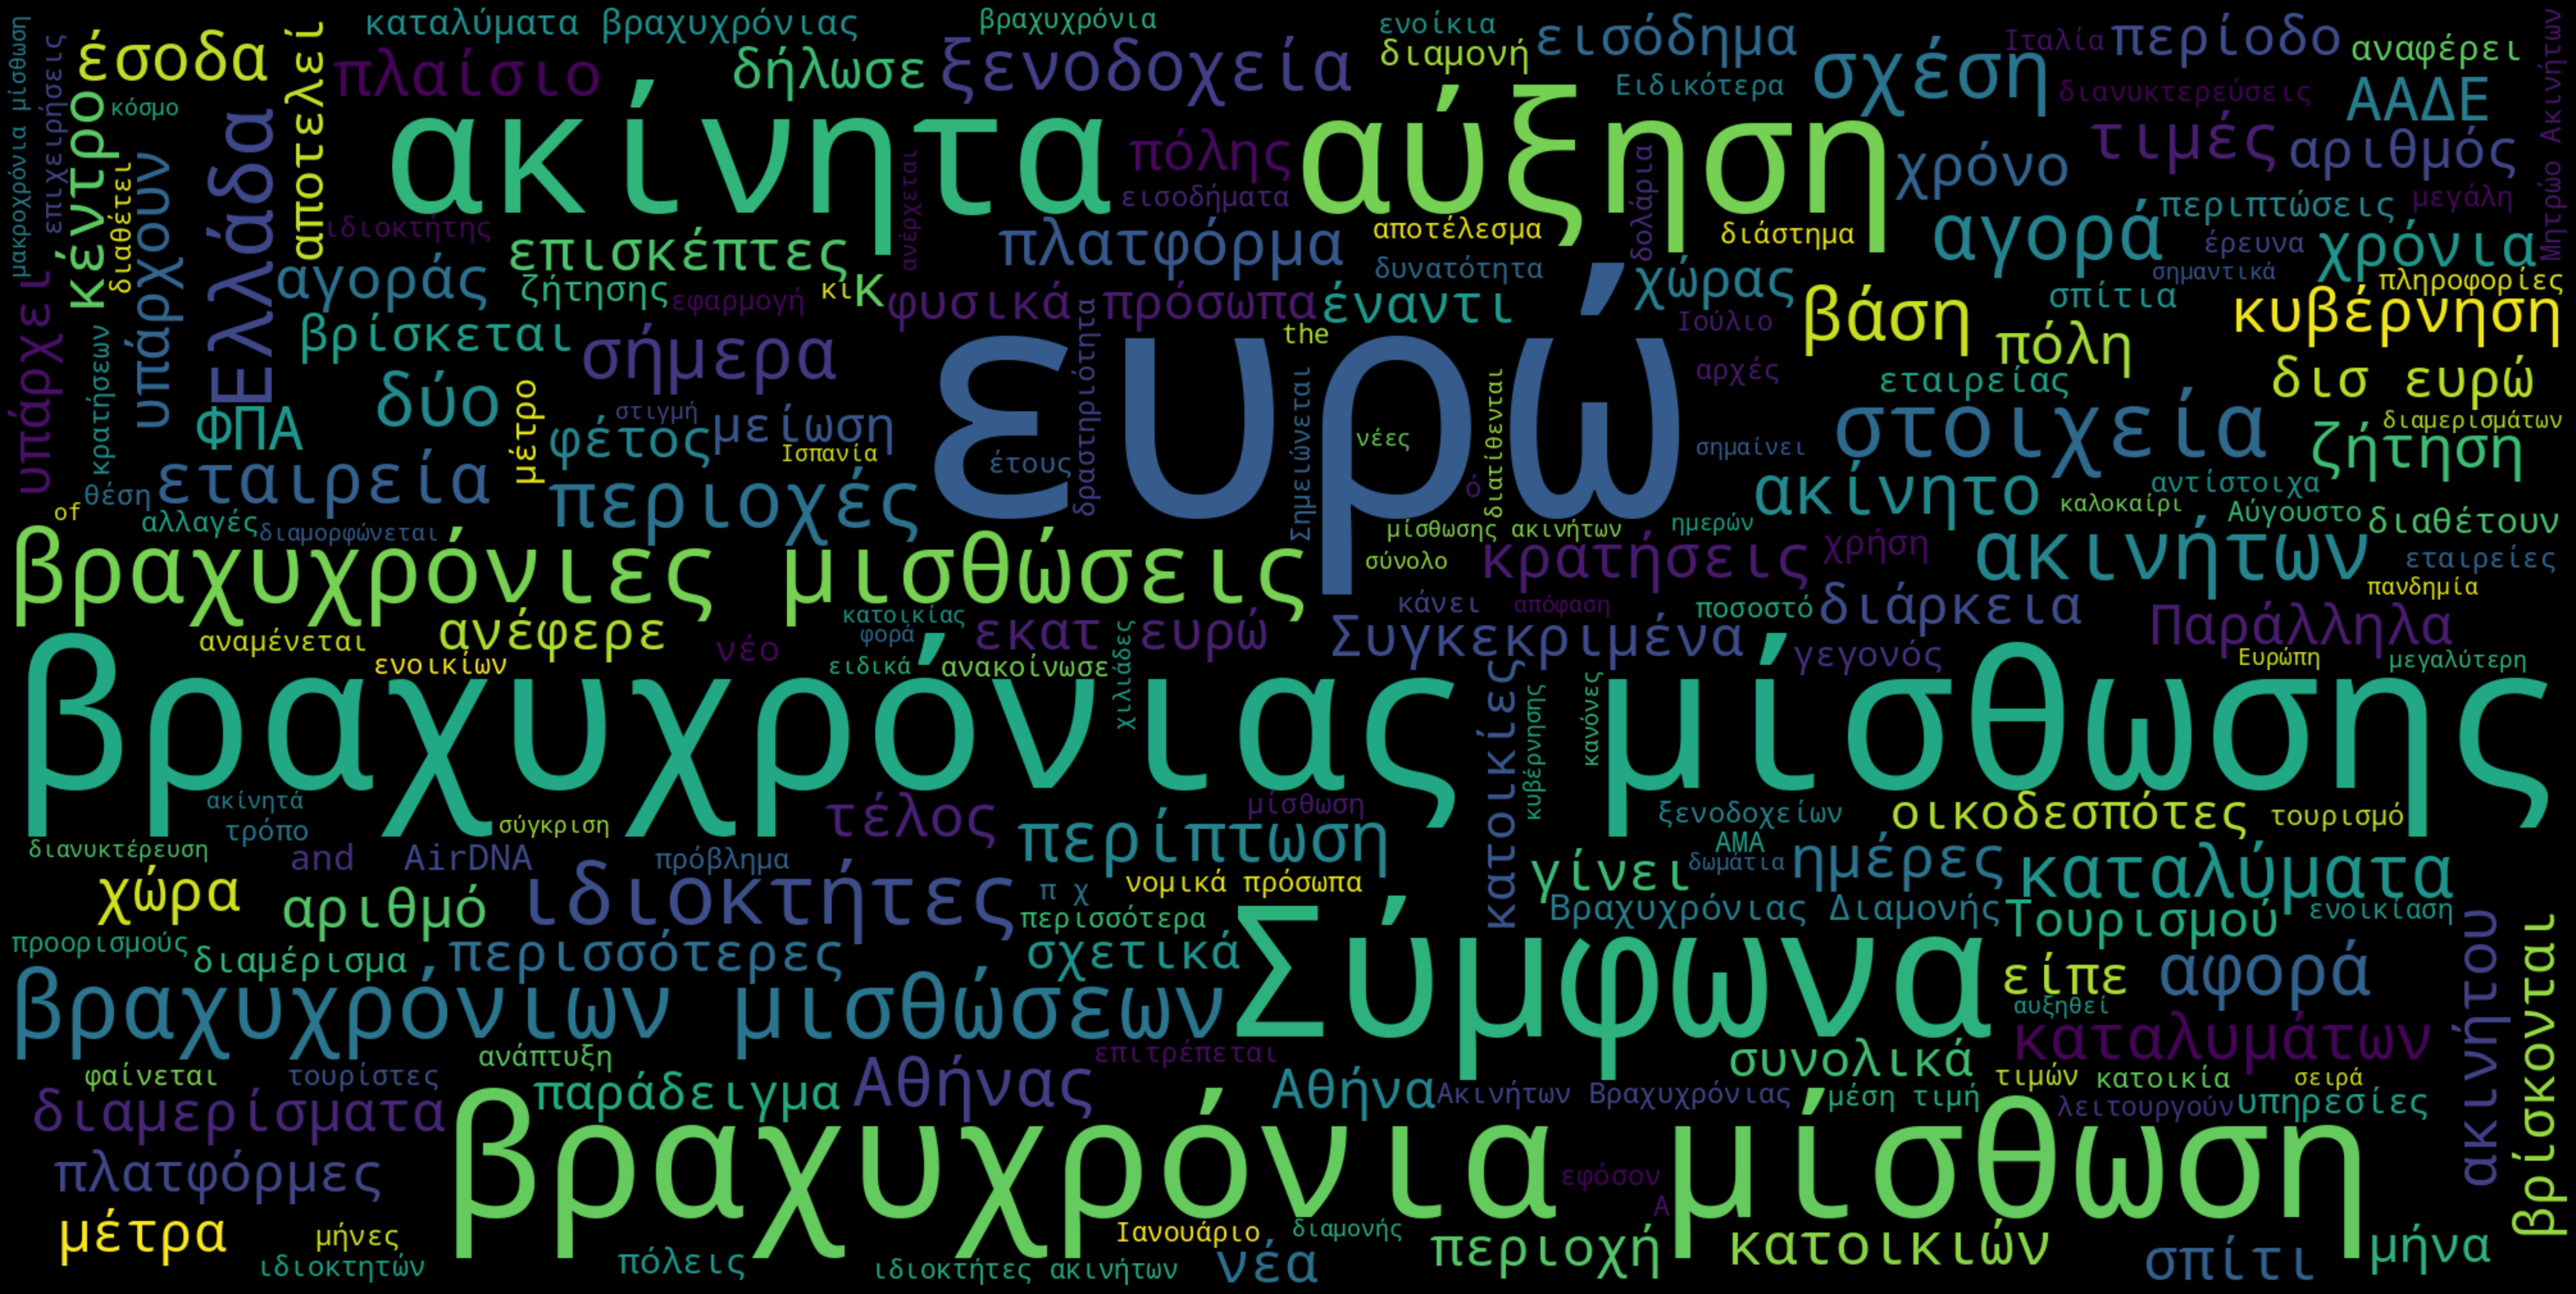

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'airbnb', 'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2024-10-23  100 κατοικία χώρα απορροφώ βραχυχρόνιος μίσθωσ...      5   
2024-07-08  χρόνος μπήκε ζωή εποχή γενικότερης απορρύθμιση...     28   
2023-12-02  φλωρεντία παγκόσμιος σημείο αναφορά τέχνα πολι...      8   
2023-05-03  airbnb επιστρέφει ενοικίαση δωματίο πρακτικός ...      8   
2023-04-29  περασμένος φεβρουάριο 300 κάτοικος μπόουζμαν μ...      6   
2024-06-21  βαρκελώνη σχεδιάζω απαγορεύω βραχυχρόνιος ενοι...      6   
2025-01-13  ισπανία σχεδιάζω αυξώ φόρος ενοίκι κατοικία βρ...     11   
2024-10-07  υπουργός επικαλείται αλληλεγγύη φιλότιμος ιδιο...     12   
2024-05-31  άκουσα πρωθυπουργός λέει πλαίσιο καταπολέμηση ...      6   
2024-05-28  31χρονη νοίκιασε σπίτι αξία 1,675 εκατομμύριο ...     17   
2023-11-27  έρευνα ελεύθερου πανεπιστήμιος βρυξελλών vub έ...      2   

            positive  joy  disgust  surprise  trust  anticipati

In [56]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2024-10-23  100 κατοικία χώρα απορροφώ βραχυχρόνιος μίσθωσ...      5   
2024-07-08  χρόνος μπήκε ζωή εποχή γενικότερης απορρύθμιση...     28   
2023-12-02  φλωρεντία παγκόσμιος σημείο αναφορά τέχνα πολι...      8   
2023-05-03  airbnb επιστρέφει ενοικίαση δωματίο πρακτικός ...      8   
2023-04-29  περασμένος φεβρουάριο 300 κάτοικος μπόουζμαν μ...      6   
2024-06-21  βαρκελώνη σχεδιάζω απαγορεύω βραχυχρόνιος ενοι...      6   
2025-01-13  ισπανία σχεδιάζω αυξώ φόρος ενοίκι κατοικία βρ...     11   
2024-10-07  υπουργός επικαλείται αλληλεγγύη φιλότιμος ιδιο...     12   
2024-05-31  άκουσα πρωθυπουργός λέει πλαίσιο καταπολέμηση ...      6   
2024-05-28  31χρονη νοίκιασε σπίτι αξία 1,675 εκατομμύριο ...     17   
2023-11-27  έρευνα ελεύθερου πανεπιστήμιος βρυξελλών vub έ...      2   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2024-10-23        31    5        1         5     25             9        8   
2024-07-08        91   26        9        27     40            57       29   
2023-12-02        53   16        2        11     28            17       10   
2023-05-03        38   11        3         4     21            15        4   
2023-04-29        34    7        2        12     12            10        8   
2024-06-21        17    4        2         2      8             8        6   
2025-01-13        39    7        9         6     21            13       12   
2024-10-07        41    7        5        10     23            15       10   
2024-05-31        40   10        3         7     23            16       14   
2024-05-28        54   11       16        17     36            15       13   
2023-11-27        19    4        0         0     17             9        3   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2024-10-23        17     9       14                             29.0  
2024-07-08        69    41       22                             13.0  
2023-12-02        17    11       36                             51.0  
2023-05-03        12    12       26                             52.0  
2023-04-29        23    16       11                             19.0  
2024-06-21        11     7        6                             21.0  
2025-01-13        23    10       16                             25.0  
2024-10-07        34    21        7                              9.0  
2024-05-31        18    11       22                             37.0  
2024-05-28        36    26       18                             20.0  
2023-11-27        11     3        8                             27.0

In [57]:
len(filtered_df)

11

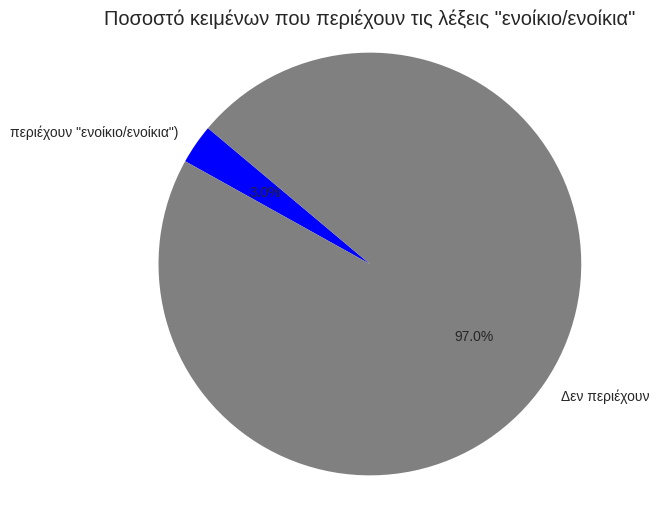

In [58]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "ενοίκιο/ενοίκια")', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "ενοίκιο/ενοίκια"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()

In [59]:
# Πάρε τις λέξεις και τις συχνότητές τους από το wordcloud
word_freq = wordcloud1.words_  # dict με μορφή {λέξη: σχετική_συχνότητα}

# Ταξινόμησέ τα σε DataFrame
top_words_df = pd.DataFrame(word_freq.items(), columns=['λέξη', 'σχετική_συχνότητα'])

# Πάρε τις 15 πιο συχνές
top_15_df = top_words_df.head(15)

# Πολλαπλασίασε με 100 (αν θες ποσοστά ή απλώς αναλογική κλίμακα)
top_15_df['σχετική_συχνότητα'] *= 100


/tmp/ipython-input-59-2951768879.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_df['σχετική_συχνότητα'] *= 100


/tmp/ipython-input-60-767232987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='σχετική_συχνότητα', y='λέξη', data=top_15_df, palette='viridis')


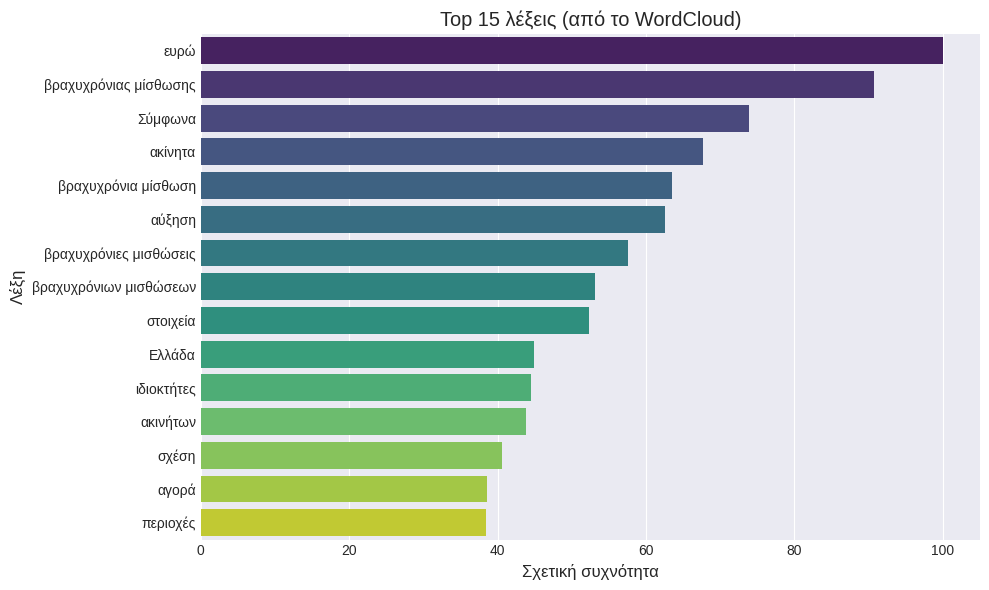

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='σχετική_συχνότητα', y='λέξη', data=top_15_df, palette='viridis')
plt.title("Top 15 λέξεις (από το WordCloud)")
plt.xlabel("Σχετική συχνότητα")
plt.ylabel("Λέξη")
plt.tight_layout()
plt.show()
